In [1]:
import numpy
import scipy
from matplotlib import pyplot
from sklearn.datasets import make_circles

In [2]:
count = 500
labels = 2

X, Y = make_circles(n_samples=count, factor=0.5, noise=0.05)
Y = Y[:,numpy.newaxis]

print(X.shape)
print(Y.shape)
print(X[:10])
print(Y[:10])

(500, 2)
(500, 1)
[[-0.85677391 -0.62245393]
 [-0.31055376  0.88885267]
 [-0.0190748   0.56446124]
 [-0.69675705  0.80506297]
 [ 0.3999105  -0.17349553]
 [-0.61445466  0.80259547]
 [-0.74724381  0.62172646]
 [-0.53732113 -0.05466757]
 [-0.55810824 -0.34689079]
 [-0.70203183  0.71727308]]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]


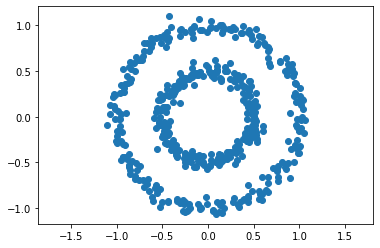

In [3]:
pyplot.scatter(X[:, 0], X[:, 1])
pyplot.axis('equal')
pyplot.show()

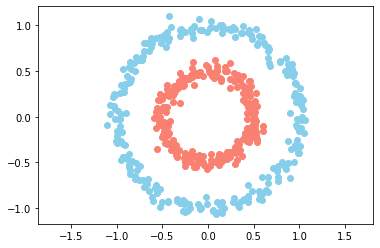

In [4]:
pyplot.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
pyplot.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')
pyplot.axis('equal')
pyplot.show()

Every neural net starts with a weights matrix `W` and a bias `B`, both initialized to random values. The neural layer knows how many neurons are in the current layer (`connections_count`) and in its output layer (`neurons_count`).

In [5]:
class NeuralLayer():
    def __init__(self, connections_count, neurons_count, activation_function):
        self.activation_function = activation_function
        self.B = numpy.random.rand(1, neurons_count) * 2 - 1
        self.W = numpy.random.rand(connections_count, neurons_count) * 2 - 1

In [6]:
x = NeuralLayer(5, 2, numpy.random)
print(x.B)
print(x.W)

[[-0.18229541  0.18456225]]
[[-0.1571929  -0.50848551]
 [ 0.76237287 -0.66719379]
 [-0.47181633 -0.7120545 ]
 [ 0.46224068 -0.90641837]
 [ 0.67513124 -0.05166975]]


In [7]:
sigmoid = (
    lambda x: 1 / (1 + numpy.e ** (-x)), # function
    lambda x: x * (1 - x)                # derivative
)

relu = lambda x: numpy.maximum(0, test)

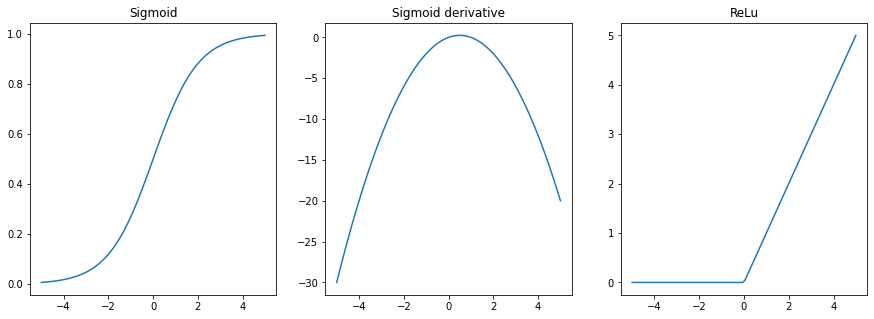

In [8]:
test = numpy.linspace(-5, 5, 100)

pyplot.subplot(1, 3, 1)
pyplot.title('Sigmoid')
pyplot.plot(test, sigmoid[0](test))

pyplot.subplot(1, 3, 2)
pyplot.title('Sigmoid derivative')
pyplot.plot(test, sigmoid[1](test))

pyplot.subplot(1, 3, 3)
pyplot.title('ReLu')
pyplot.plot(test, relu(test))

figure = pyplot.gcf()
figure.set_size_inches(15,5)
pyplot.show()

In [9]:
def create_neural_net(neurons_per_layer, activation_function):
    neural_net = []

    for l in range(len(neurons_per_layer) - 1):
        neural_net.append(
            NeuralLayer(neurons_per_layer[l], neurons_per_layer[l+1], activation_function)
        )

    return neural_net

In [21]:
neurons_per_layer = [labels, 4, 8, 16, 8, 4, 1]
neural_net = create_neural_net(neurons_per_layer, sigmoid)
neural_net

In [11]:
cost_function = (
    lambda Yp, Yr: numpy.mean((Yp - Yr) ** 2), # mean squared error
    lambda Yp, Yr: 2 * (Yp - Yr)               # derivative
)

Here we do the training by first passing the data forward through all of our layers, then we do a backpropagation. We use a `range(0, 6)` for our seven-layer neural net, and then we reverse that, getting an iterator from 5 to 0.

We copy the weights so that we don't modify it's value and they are treated separately.

In [16]:
class Trainer():
    def __init__(self, neural_net, X, Y):
        self.neural_net = neural_net
        self.X = X
        self.Y = Y
        
    def predict(self):
        out = [(None, self.X)]

        for l in range(len(self.neural_net)):
            weighted_sum = out[-1][1] @ self.neural_net[l].W + self.neural_net[l].B
            prediction = self.neural_net[l].activation_function[0](weighted_sum)
            out.append((weighted_sum, prediction))

        return out
    
    def train(self, cost_function, learning_rate=0.001):
        out = self.predict()
        gradient = []

        for l in reversed(range(0, len(self.neural_net))):
            prediction = out[l+1][1]

            if l == self._last_layer():
                gradient.insert(0, cost_function[1](prediction, self.Y) * self.neural_net[l].activation_function[1](prediction))
            else:
                gradient.insert(0, gradient[0] @ Wcopy.T * self.neural_net[l].activation_function[1](prediction))

            Wcopy = self.neural_net[l].W 
            self._gradient_descent(l, gradient, out, learning_rate)

        return out[-1][1]
    
    def _last_layer(self):       
        return len(self.neural_net) - 1
        
    def _gradient_descent(self, l, gradient, out, learning_rate):
        self.neural_net[l].B = self.neural_net[l].B - numpy.mean(gradient[0], axis=0, keepdims=True) * learning_rate
        self.neural_net[l].W = self.neural_net[l].W - out[l][1].T @ gradient[0] * learning_rate        

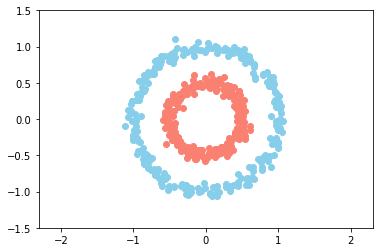

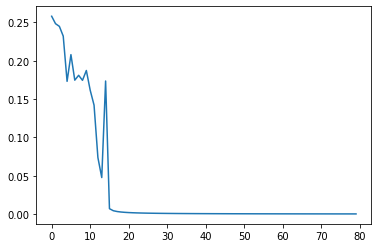

In [28]:
import time
from IPython.display import clear_output
%matplotlib inline
from matplotlib import pyplot

neural_net = create_neural_net([labels, 4, 8, 1], sigmoid)
trainer = Trainer(neural_net, X, Y)
loss = []

for i in range(2000):
    Yp = trainer.train(cost_function, learning_rate=0.05)
    
    if i % 25 == 0:
        loss.append(cost_function[0](Yp, Y))
        
        resolution = 50
        _x0 = numpy.linspace(-1.5, 1.5, resolution)
        _x1 = numpy.linspace(-1.5, 1.5, resolution)
        _Yt = numpy.zeros((resolution, resolution))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Yt[i0, i1] = Trainer(neural_net, numpy.array([[x0, x1]]), Y).predict()[0][0]

        pyplot.pcolormesh(_x0, _x1, _Yt, cmap='RdBu', vmin=_Yt.min(), vmax=_Yt.max())
        pyplot.axis('equal')
        pyplot.scatter(X[Y[:, 0] == 0, 0], X[Y[:,0] == 0, 1], c='skyblue')
        pyplot.scatter(X[Y[:, 0] == 1, 0], X[Y[:,0] == 1, 1], c='salmon')
        
        clear_output(wait=True)
        pyplot.show()
        pyplot.plot(range(len(loss)), loss)
        pyplot.show()
        time.sleep(0.5)